In [1]:
import mpl_toolkits.axisartist.grid_finder
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

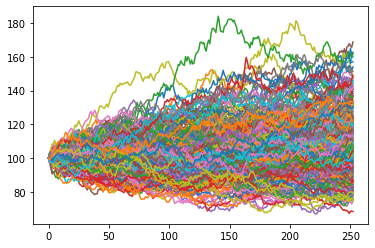

In [2]:
# Geometric Brownian Motion by Eule-Maruyama
def gbm_path(S0,mean,volatility,T=1,t=252,N=1000):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = S0
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * phi)
    return S
# Phlot GBM function
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
df = gbm_path(100,0.05,0.2,1,252,1000)
plot_path(df)

In [3]:
def mv_path(S0,mean,volatility,T=1,t=252,N=100,k=1):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    S[0] = np.log(S0)
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*k))
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + k * (alpha - S[i-1]) * dt + sigma * phi * np.sqrt(dt)
    return S


In [4]:
def plot_path(df,t=252):
    x = np.linspace(0,t,t)
    for i in range(0,t):
        plt.plot(x,df[::,i])
#def mv_path(S0,mean,volatility,T=1,t=252,N=1000,k=1):
#df = mv_path(100,90,10,1,10,100)
df = mv_path(58.37,0.0065,1.3677e-02,1,254,1000,6.616e-05)

0.93172649779117

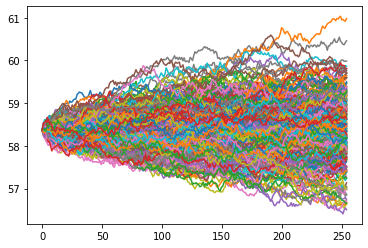

In [5]:
S0,mean,volatility,T,t,N,k = 58.37,0.0065,1.3677e-02,1,254,1000,6.616e-05
alpha = mean - ((volatility ** 2) / (2*k))
#df = mv_path(10,10,3,1,252,10000)
plot_path(np.exp(df),254)

# Estimated - theorectical mean
np.mean(np.exp(df)) - np.exp(-k*t)*S0 + (1-np.exp(-k*t))*alpha


#rho,delta, gamma
i = 100
j = 100
V = np.zeros((100,100))
r,t,T = 0.03, 0,10
S = 100
K =90
V[0] = K * np.exp(-r * (T-t))
V[::,-1] = max(S-K)
V[-1] = 0
for n in range(1,i-1):
    for m in range(1,j-1):



dt, ds, sigma
a = 1 + r * dt + (sigma ** 2) * (dt / (ds ** 2))
b = -(r - 0.5 * (sigma**2) * (dt / (2 * ds)) - 0.5 * (sigma **2) * (dt / (ds ** 2)))
c = (r - 0.5 * (sigma**2) * (dt / (2 * ds)) - 0.5 * (sigma **2) * (dt / (ds ** 2)))
#V[

In [6]:
l = np.zeros((100,100))
for i in range(1,100-1):
    for j in range(1,100):
        l[i][j] = 1
l

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

19556336.115082745

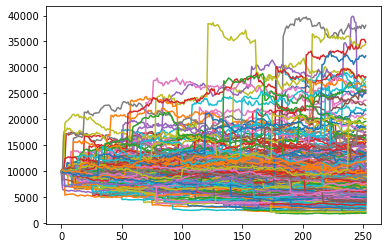

In [7]:
def mjd_path(S0,mean,volatility,T=1,t=252,N=1000,LAMBDA=1 ,jumpmean=0,jumpvol=0):
    S = np.zeros((t,N))
    dt = T/t
    mu = mean
    sigma = volatility
    muj = jumpmean
    sigma_j = jumpvol
    S[0] = S0
    k = np.exp(muj + sigma_j ** 2 / 2) - 1
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        poi_rv = npr.poisson(LAMBDA * dt,N) * npr.normal(muj,sigma_j,N)
        #poi_rv = npr.normal(muj,sigma_j,N)
        norm_rv = (mu - sigma ** 2 / 2 - LAMBDA * k) * dt + sigma * phi * np.sqrt(dt)
        S[i] = S[i-1] * np.exp(norm_rv + poi_rv)

    return S
df = mjd_path(10000,0.02,0.2,1,252,1000,LAMBDA=3,jumpmean=0,jumpvol=0.3)
plot_path(df)
np.mean(df)
df.var()

Expected value of MJD
$$
\[
\mathbb{E}[S_t] = S_0 \exp\left[ \left( \mu - \frac{\sigma^2}{2} - \lambda \kappa \right)t + \lambda t \kappa \right]
\]
$$

In [8]:
np.mean(df)
k = np.exp(0 + 0.3 ** 2 / 2) - 1
np.exp(0.02 * 252 + 252* k)
#expected value of MJD
S0, mu, sigma, t, lam, mu_j, sigma_j  = 10000,0.02,0.2,252,3,0,0.3
k = np.exp(mu_j + sigma_j ** 2 / 2) - 1
mean_MJD = S0 * np.exp((mu - lam* k - sigma**2/2)*t + lam*t*k)
#mean_MJD = S0 * np.exp((mu - lam* k - sigma**2/2)*t + lam*mu_j)
print(mean_MJD)
var_MJD = S0 * np.exp(t * sigma**2 + sigma_j** 2)
print(var_MJD)

10000.0
261080767.64026538


condition:
d < 1+r < u

In [9]:
#in test
def BS_binomial(S0,K,T,r,ts,D,vol,N,option_type = "C",probi_type = 'P'):

    dt = T/ts
    #u = np.exp( vol * np.sqrt(dt))
    u = 0.2
    d = 1 / u
    #qu = ( np.exp(r * dt / N) - d ) / ( u - d )
    #qd = 1 - qu

    tree = np.zeros((ts,ts))
    for i in range(ts):
        for j in range(ts):
            tree[j,i] = S0 * (u ** (i-j)) * (d **j)
    return tree

In [10]:
#https://github.com/VivekPa/BinomialOptModel/blob/master/binomial_option_model.py
import numpy as np


def binomial_model(N, S0, u, r, K):
    """
    N = number of binomial iterations
    S0 = initial stock price
    u = factor change of upstate
    r = risk free interest rate per annum
    K = strike price
    """
    d = 1 / u
    p = (1 + r - d) / (u - d)
    q = 1 - p

    # make stock price tree
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Generate option prices recursively
    option = np.zeros([N + 1, N + 1])
    option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N] - K))
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (
                1 / (1 + r) * (p * option[j, i + 1] + q * option[j + 1, i + 1])
            )
    return option

In [11]:
def BK(S0,mean,volatility,T=1,t=252,N=1000,kappa=1):
    dt = T/t
    S = np.zeros((t,N))
    mu = np.log(mean)
    sigma = volatility
    S[0] = np.log(S0)
    alpha = mu - sigma ** 2 / (2 * kappa)
    for i in range(1,t):
        phi = npr.normal(0,1,N)
        S[i] = S[i-1] + kappa * (alpha - S[i-1]) + sigma * np.sqrt(dt) * phi
    return np.exp(S)

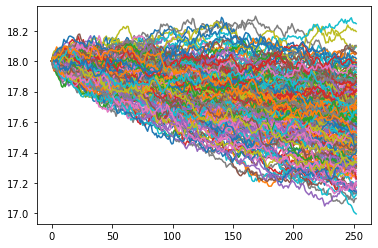

In [12]:
#S0,mean,volatility,T,t,N,kappa = 58.37,59,1.3677e-02,1,252,1000,6.616e-05
S0,mean,volatility,T,t,N,kappa = 18,18.5,1.3677e-02,1,252,1000,6.616e-05
df = BK(S0,mean,volatility,T,t,N,kappa)
plot_path(df,t)

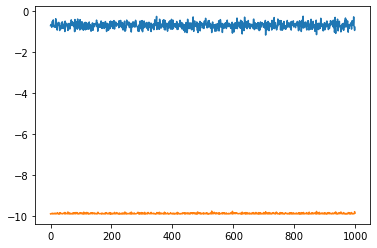

In [13]:
###########MEAN
alpha = mean - ((volatility ** 2) / (2*k))

# Estimated - theorectical mean
true_mean = np.exp(-k*t)*S0 + (1-np.exp(-k*t))*alpha
np.mean(df) - true_mean

# Estimated mean
estimated_mean = np.mean(df,axis = 0)

############VAR
#true var
true_var = sigma**2/ (2*kappa) *( 1 - np.exp(-2 * kappa *t))
#estimated var
estimated_var = np.var(df,axis = 0)

plt.plot(estimated_mean - true_mean)
plt.plot(estimated_var - true_var)

Text(0.5, 1.0, 'Expected Futures price when long-run mean is constant')

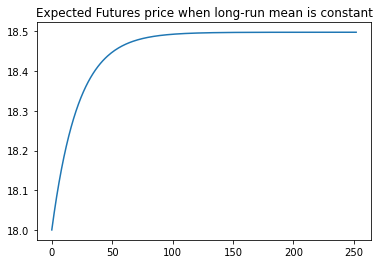

In [14]:
h = []
for i in range(0,252):
    h.append(np.exp(-k*i)*S0 + (1-np.exp(-k*i))*alpha)
plt.plot(np.linspace(0,252,252),h)
plt.title('Expected Futures price when long-run mean is constant')

In [15]:
data = pd.read_csv("BrentOilPrices.csv").Price[:10]
list(data)
test_t = 10
Z_m = list(data)
r = 0.1
star = sigma ** 2 / 2 * (test_t + 2 * np.exp(test_t) - 0.5 * np.exp(-2 * test_t) - 3 / 2) - np.log(Z_m) - r * ( 1 - np.exp(-test_t))
star

h = [0]
for i in range(1,test_t):




IndentationError: expected an indented block (741789950.py, line 13)

In [ ]:
test_t = 1
star = sigma ** 2 / 2 * (test_t + 2 * np.exp(test_t) - 0.5 * np.exp(-2 * test_t) - 3 / 2) - np.log(Z_m[0]) - r * ( 1 - np.exp(-test_t))
mean = star / np.exp(-1)

In [ ]:
data

In [ ]:
S0,mean,volatility,T,t,N,kappa = 18,18.5,1.3677e-02,1,252,1000,6.616e-05
df = BK(S0,mean,volatility,T,t,N,kappa)
plot_path(df,t)